# Пайплайн для модели определения аритмии


https://archive.ics.uci.edu/ml/datasets/Arrhythmia

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
BASE_PATH = Path('/content/drive/My Drive/Data Science/')
DATASET_PATH = BASE_PATH / 'arrhythmia.data'

In [4]:
f = open(DATASET_PATH)
lines = f.readlines()

In [5]:
for idx, line in enumerate(lines):
    lines[idx] = line.strip('\n').split(',')

In [6]:
print(f'Dataset size: {len(lines)}')
print(f'Features count: {len(lines[0])}')

Dataset size: 452
Features count: 280


## Описание входного вектора


```
1 Age: Age in years , linear
2 Sex: Sex (0 = male; 1 = female) , nominal
3 Height: Height in centimeters , linear
4 Weight: Weight in kilograms , linear
5 QRS duration: Average of QRS duration in msec., linear
6 P-R interval: Average duration between onset of P and Q waves
  in msec., linear
7 Q-T interval: Average duration between onset of Q and offset
  of T waves in msec., linear
8 T interval: Average duration of T wave in msec., linear
9 P interval: Average duration of P wave in msec., linear

Vector angles in degrees on front plane of:, linear
10 QRS
11 T
12 P
13 QRST
14 J

15 Heart rate: Number of heart beats per minute ,linear
    
Of channel DI:
Average width, in msec., of: linear
16 Q wave
17 R wave
18 S wave
19 R' wave, small peak just after R
20 S' wave

21 Number of intrinsic deflections, linear

22 Existence of ragged R wave, nominal
23 Existence of diphasic derivation of R wave, nominal
24 Existence of ragged P wave, nominal
25 Existence of diphasic derivation of P wave, nominal
26 Existence of ragged T wave, nominal
27 Existence of diphasic derivation of T wave, nominal

Of channel DII: 
 28 .. 39 (similar to 16 .. 27 of channel DI)
Of channels DIII:
 40 .. 51
Of channel AVR:
 52 .. 63
Of channel AVL:
 64 .. 75
Of channel AVF:
 76 .. 87
Of channel V1:
 88 .. 99
Of channel V2:
 100 .. 111
Of channel V3:
 112 .. 123
Of channel V4:
 124 .. 135
Of channel V5:
 136 .. 147
Of channel V6:
 148 .. 159

Of channel DI:
 Amplitude , * 0.1 milivolt, of
 160 JJ wave, linear
 161 Q wave, linear
 162 R wave, linear
 163 S wave, linear
 164 R' wave, linear
 165 S' wave, linear
 166 P wave, linear
 167 T wave, linear
 
 168 QRSA , Sum of areas of all segments divided by 10,
     ( Area= width * height / 2 ), linear
 169 QRSTA = QRSA + 0.5 * width of T wave * 0.1 * height of T
     wave. (If T is diphasic then the bigger segment is
     considered), linear

Of channel DII:
 170 .. 179
Of channel DIII:
 180 .. 189
Of channel AVR:
 190 .. 199
Of channel AVL:
 200 .. 209
Of channel AVF:
 210 .. 219
Of channel V1:
 220 .. 229
Of channel V2:
 230 .. 239
Of channel V3:
 240 .. 249
Of channel V4:
 250 .. 259
Of channel V5:
 260 .. 269
Of channel V6:
 270 .. 279
```



## Описание целевой переменной

```
Class code:    Class:                      Number of instances:
01             Normal                                       245
02             Ischemic changes (Coronary Artery Disease)    44
03             Old Anterior Myocardial Infarction            15
04             Old Inferior Myocardial Infarction            15
05             Sinus tachycardy                              13
06             Sinus bradycardy                              25
07             Ventricular Premature Contraction (PVC)        3
08             Supraventricular Premature Contraction         2
09             Left bundle branch block                       9    
10             Right bundle branch block                     50
11             1. degree AtrioVentricular block               0    
12             2. degree AV block                             0
13             3. degree AV block                             0
14             Left ventricule hypertrophy                    4
15             Atrial Fibrillation or Flutter                 5
16             Others                                        22
```


## Генерация фичей

In [7]:
columns = {
    1: 'Age',
    2: 'Sex',
    3: 'Height',
    4: 'Weight',
    5: 'QRS duration',
    6: 'P-R interval',
    7: 'Q-T interval',
    8: 'T interval',
    9: 'P interval',
    10: 'QRS',
    11: 'T',
    12: 'P',
    13: 'QRST',
    14: 'J',
    15: 'Heart rate',
    (16, 27): 'Channel DI',
    (28, 39): 'Channel DII',
    (40, 51): 'Channels DIII',
    (52, 63): 'Channel AVR',
    (64, 75): 'Channel AVL',
    (76, 87): 'Channel AVF',
    (88, 99): 'Channel V1',
    (100, 111): 'Channel V2',
    (112, 123): 'Channel V3',
    (124, 135): 'Channel V4',
    (136, 147): 'Channel V5',
    (148, 159): 'Channel V6',
    (160, 169): 'Amplitude channel DI',
    (170, 179): 'Amplitude channel DII',
    (180, 189): 'Amplitude channels DIII',
    (190, 199): 'Amplitude channel AVR',
    (200, 209): 'Amplitude channel AVL',
    (210, 219): 'Amplitude channel AVF',
    (220, 229): 'Amplitude channel V1',
    (230, 239): 'Amplitude channel V2',
    (240, 249): 'Amplitude channel V3',
    (250, 259): 'Amplitude channel V4',
    (260, 269): 'Amplitude channel V5',
    (270, 279): 'Amplitude channel V6',
    280: 'Target',
}

In [8]:
df = pd.DataFrame(lines)
df = df.replace('?', np.nan)
df = df.astype(float)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0
5,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14.0
6,40.0,1.0,160.0,52.0,77.0,129.0,377.0,133.0,77.0,77.0,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1.0
7,49.0,1.0,162.0,54.0,78.0,0.0,376.0,157.0,70.0,67.0,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1.0
8,44.0,0.0,168.0,56.0,84.0,118.0,354.0,160.0,63.0,61.0,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1.0
9,50.0,1.0,167.0,67.0,89.0,130.0,383.0,156.0,73.0,85.0,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10.0


In [10]:
df_new = pd.DataFrame()
# Для интервальных фичей сгенерируем отдельные столбцы с mean и std
for idx, col in columns.items():
    col = col.replace('-', ' ').replace(' ', '_').lower()
    if isinstance(idx, int):
        df_new[col] = df[idx - 1]
    else:
        df_new[f'{col}_mean'] = df.iloc[:, idx[0]-1:idx[1]-1].mean(axis=1)
        df_new[f'{col}_std'] = df.iloc[:, idx[0]-1:idx[1]-1].std(axis=1)

In [11]:
df = df_new
df.head(10)

,age,sex,height,weight,qrs_duration,p_r_interval,q_t_interval,t_interval,p_interval,qrs,...,amplitude_channel_v2_std,amplitude_channel_v3_mean,amplitude_channel_v3_std,amplitude_channel_v4_mean,amplitude_channel_v4_std,amplitude_channel_v5_mean,amplitude_channel_v5_std,amplitude_channel_v6_mean,amplitude_channel_v6_std,target
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,4.882395,0.100000,5.254284,3.355556,8.219354,4.377778,9.301852,3.877778,7.895217,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,6.173555,-0.322222,4.179347,2.133333,5.250952,3.644444,7.752921,3.411111,6.967683,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,7.567658,2.922222,7.126145,0.522222,4.251699,2.700000,5.181940,2.666667,4.946716,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,5.024219,1.511111,4.974044,4.677778,10.599620,5.777778,12.786201,5.300000,11.752447,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,4.612754,-0.277778,5.183333,3.133333,7.826398,3.600000,7.469605,4.255556,9.233920,7.0
5,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,39.238983,-14.622222,41.838164,4.800000,16.978737,3.655556,10.036447,2.822222,5.844394,14.0
6,40.0,1.0,160.0,52.0,77.0,129.0,377.0,133.0,77.0,77.0,...,16.323024,-2.488889,7.820237,0.566667,3.589916,1.766667,3.893263,2.422222,4.940338,1.0
7,49.0,1.0,162.0,54.0,78.0,0.0,376.0,157.0,70.0,67.0,...,7.412677,-1.977778,6.372358,1.000000,3.072458,2.333333,5.494088,2.488889,5.756397,1.0
8,44.0,0.0,168.0,56.0,84.0,118.0,354.0,160.0,63.0,61.0,...,5.167070,-2.066667,7.861934,1.611111,4.589783,2.811111,5.840686,2.333333,4.509989,1.0
9,50.0,1.0,167.0,67.0,89.0,130.0,383.0,156.0,73.0,85.0,...,5.183173,-0.711111,4.525054,2.100000,4.961603,3.744444,8.422902,3.311111,7.305211,10.0


In [12]:
# Колонка 279 - целевая переменная
df.target.value_counts()

1.0     245
10.0     50
2.0      44
6.0      25
16.0     22
3.0      15
4.0      15
5.0      13
9.0       9
15.0      5
14.0      4
7.0       3
8.0       2
Name: target, dtype: int64

In [13]:
!pip install shap numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 31.8 MB/s eta 0:00:00


In [14]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], random_state=42)

## Обучение

In [18]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.7 MB/s eta 0:00:00


In [19]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent',
    loss_function='MultiClass'
)

In [21]:
model.fit(
    X_train, y_train,
    cat_features=None,
    eval_set=(X_test, y_test),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [23]:
model.save_model('arrhythmia')

In [24]:
model = CatBoostClassifier()      # parameters not required.
model.load_model('arrhythmia')

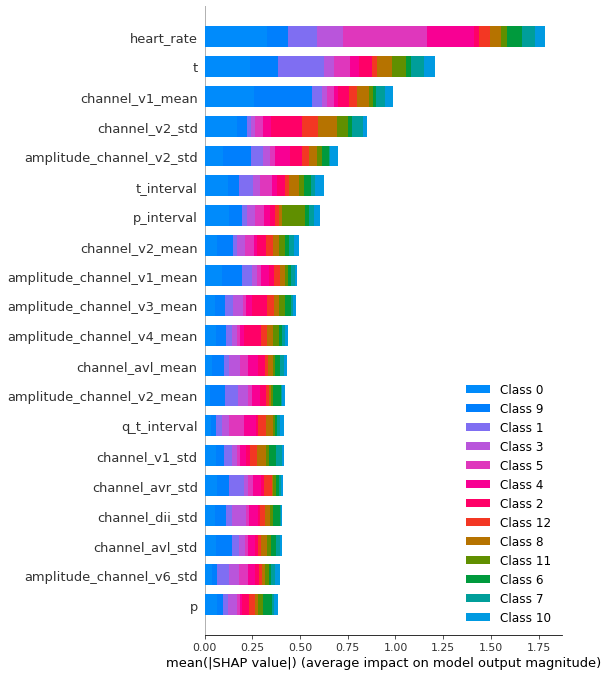

In [25]:
y_preds = model.predict(X_test)

# строим модель объяснения в SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# покажем объяснение
shap.initjs() # для работы в колабе
shap.summary_plot(shap_values, X_test)

Поэтому будем анализировать только первый класс - целевой.

Explained expected value: [[ 0.04231437 -0.02497381  0.01402799 ...  0.0513396  -0.00695545
   0.03408611]
 [ 0.01113877 -0.03904603 -0.00066517 ... -0.00317213 -0.02490214
  -0.08437105]
 [-0.01012066  0.05459343  0.00774479 ... -0.03233831 -0.01955317
  -0.09409589]
 ...
 [-0.18599061 -0.05462725  0.01618352 ...  0.03678908 -0.02710869
  -0.0314444 ]
 [ 0.08192529  0.03067962  0.00749598 ... -0.08297392  0.00699356
  -0.13489178]
 [ 0.0383236   0.05391289  0.00778736 ... -0.0311304   0.01626054
  -0.00498976]]


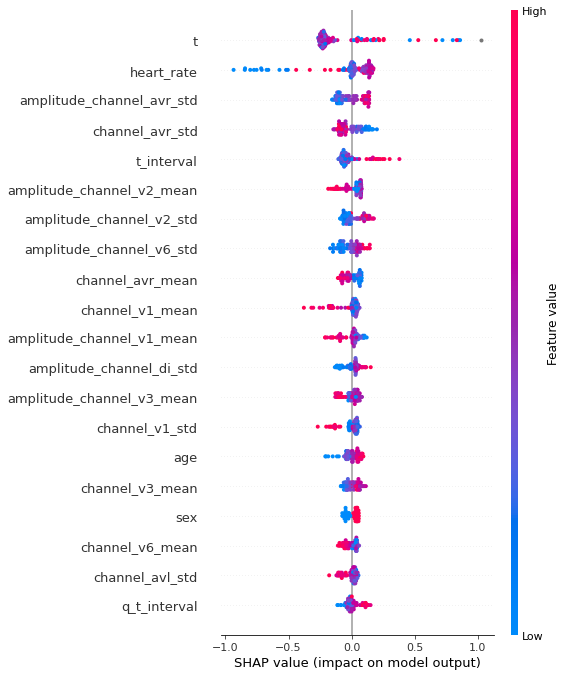

In [26]:
if isinstance(shap_values, list):
    shap_values = shap_values[1]

print(f'Explained expected value: {shap_values}')

shap.summary_plot(shap_values, X_test)

С каждым объектом и признаком связывается величина выигрыша или проигрыша. Она показывает, что данное значение поднимало ответ нашей модели или опускало:
- положительные значения - увеличивался ответ (справа от вертикальной линии, целевой класс)
- отрицательные значения - уменьшался ответ (слева от вертикальной линии, нецелевой класс)

А результирующий график - это 
- толщина полосы - как много таких значений
- длина полосы - какой вклад вносится в ответ
- high/low - значения в самом признаке


**Пара интерпретаций:**
1. Частота сердечных сокращений очень существенно влияет на наличие аритмии
2. Также значимыми можно считать интервалы V1, V2, DII
3. Также большую важность имеет интервал T, Q-T


Теперь можем работать с конкретными клиентами и давить на нужные места.

А еще можем отрисовать верхние диаграммы немного иначе, через waterfall.

Есть визуализация через тепловые карты. Это для визуализации вклада по всем данным (практически, как было в summary_plot, только будем еще знать, по каким объектам).

Такие диаграммы еще могут и определить признаки, которые решают задачу. К примеру, видим, что
1. Основной вес модели дают первые 6 признаков
2. Такой признак как возраст (age) в данной модели оказался не столько значимым, скорее всего потому что он коррелирует с первыми 6 признаками в том или ином виде (чем старше человек, тем специфичнее его показатели на кардиограмме)